In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn
from mpl_toolkits.mplot3d import Axes3D

In [11]:
data = pd.read_csv('./mlm.csv')

In [12]:
a = data.x
b = data.y
c = data.z

Text(0.5, 0, 'z Label')

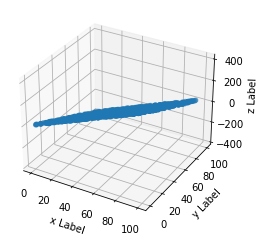

In [13]:
fig = plt.figure()
ax = plt.gca(projection='3d')
ax.scatter(a,b,c)
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')

In [14]:
X = data.iloc[:, : -1].values
Z = data.z.values.reshape(-1,1)

In [16]:
X = torch.from_numpy(X).type(torch.float32)
Z = torch.from_numpy(Z).type(torch.float32)

In [17]:
model= nn.Linear(2,1)

In [18]:
loss_fn = nn.MSELoss()

In [19]:
opt = torch.optim.Adam(model.parameters(), lr=0.0005)

In [20]:
for epoch in range(400):
    for x, z in zip(X, Z):
        z_pred = model(x)
        loss = loss_fn(z_pred,z)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():
        if epoch % 50 == 0:
            print('loss:',loss.item())

loss: 51.26137924194336
loss: 11.224374771118164


In [23]:
loss_fn(model(X),Z)

tensor(3.1704, grad_fn=<MseLossBackward>)

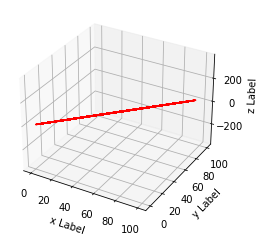

In [33]:
fig = plt.figure()
ax = plt.gca(projection='3d')
ax.plot(a,b,model(X).detach().numpy().squeeze(),c='r')

ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')
plt.show()